<a href="https://colab.research.google.com/github/Sai-Vara-Prasad-Lekkalapudi/major-project/blob/main/Major_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Major project

##Project Topic:
Financial Feature Optimization for Corporate Bankruptcy Prediction using Gradient Boosting Models.

##Dataset: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data
##Research question:
Which financial indicators are most influential in predicting corporate bankruptcy, and how does feature selection affect model performance
##Goal:
My aim is to identify the most important financial features influencing bankruptcy prediction and to understand how feature selection and dimensionality reduction affect both accuracy and interpretability of machine learning models.


In [2]:
# Importing required libraries
import pandas as pd
from scipy.io import arff
import urllib.request

#  List all 5 years ARFF file URLs from github raw data
urls = [
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/1year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/2year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/3year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/4year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/5year.arff'
]

# Downloading and loading each file into a dictionary of DataFrames
dfs = {}
for url in urls:
    year = url.split('/')[-1].split('.')[0]
    local_path = f'/content/{year}.arff'
    urllib.request.urlretrieve(url, local_path)
    data, meta = arff.loadarff(local_path)
    dfs[year] = pd.DataFrame(data)
    print(f"\nLoaded {year}: shape = {dfs[year].shape}")
    print(dfs[year].info())




Loaded 1year: shape = (7027, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Att

I have successfully loaded all five datasets (1-year to 5-year) from the Polish Companies Bankruptcy dataset. Each file represents a different forecasting horizon - predicting whether a company will go bankrupt within 1 to 5 years.

Each dataset contains 64 financial indicators and 1 target variable (class), showing if a firm is bankrupt (b) or non-bankrupt (n). The number of records varies slightly across years, but all share the same structure and features.

From my observation:

The schema of all files is consistent (Attr1 - Attr64 + class).

Some attributes have missing values (especially in Attr21, Attr37, Attr45, and Attr60).

There is a high class imbalance — only a small portion of companies are bankrupt.

This gives me a clear base to proceed with data preprocessing, feature selection, and model training for bankruptcy prediction.

# Data Understanding (Exploration) EDA

Dataset Shape: (7027, 65)
Number of Missing Values:
 5835


/tmp/ipython-input-4278658148.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


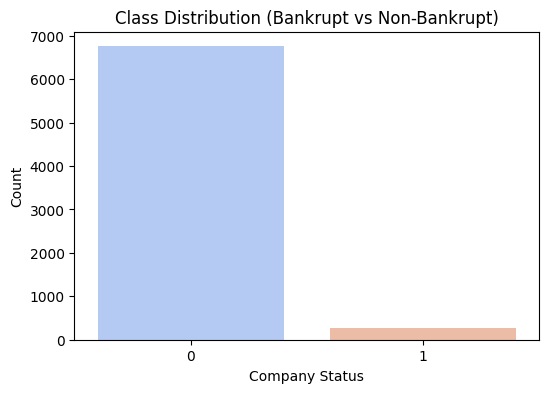

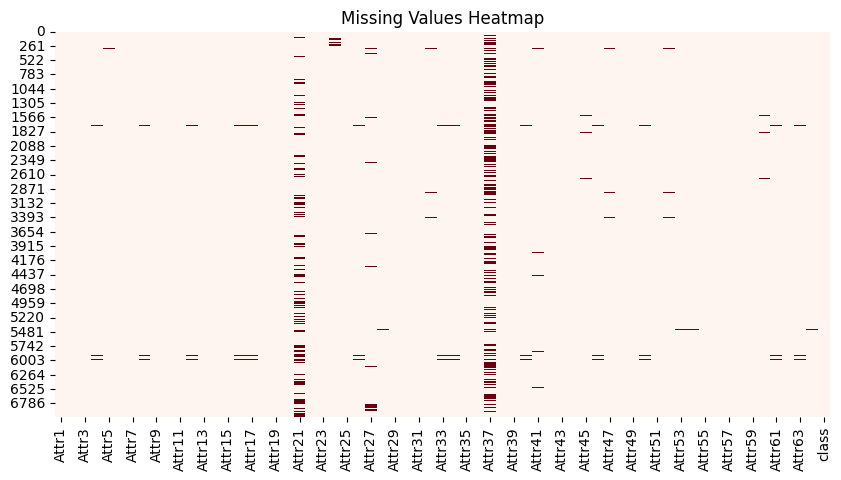

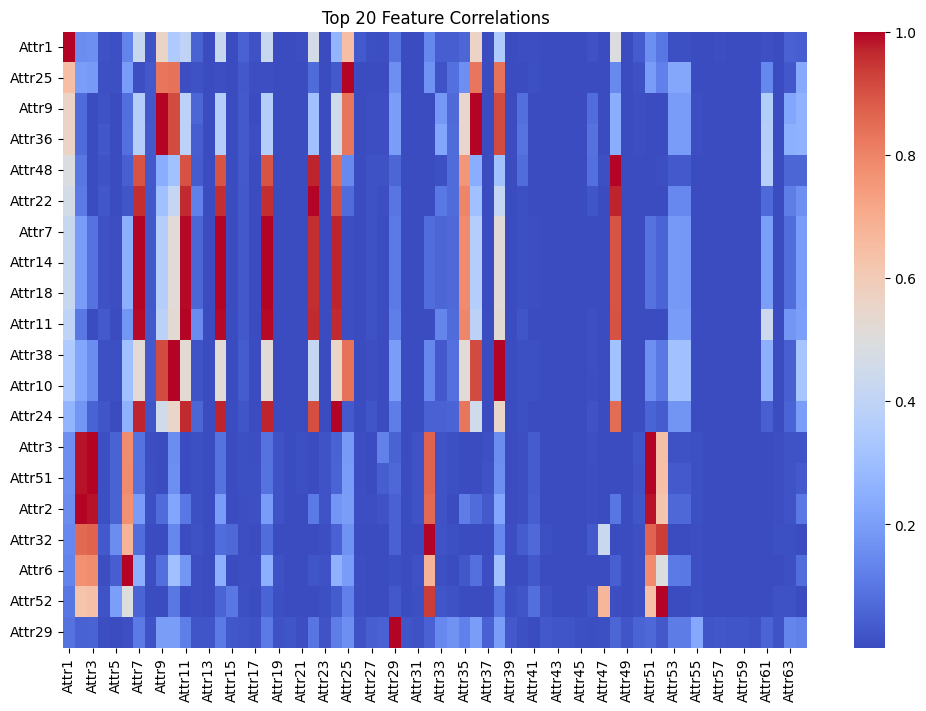

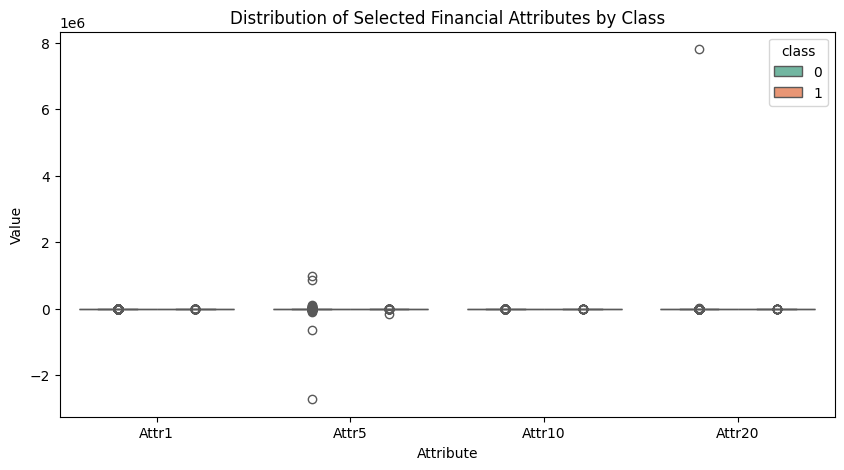

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['1year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (10173, 65)
Number of Missing Values:
 12157


/tmp/ipython-input-3426513962.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


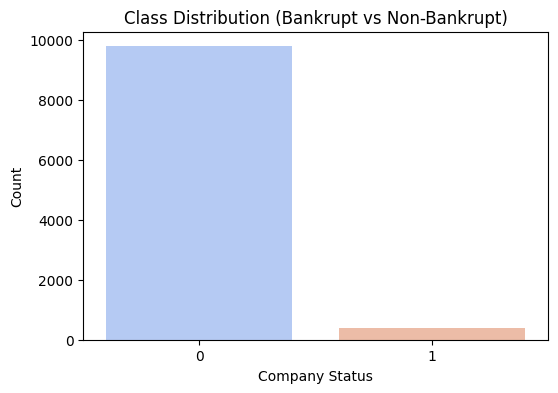

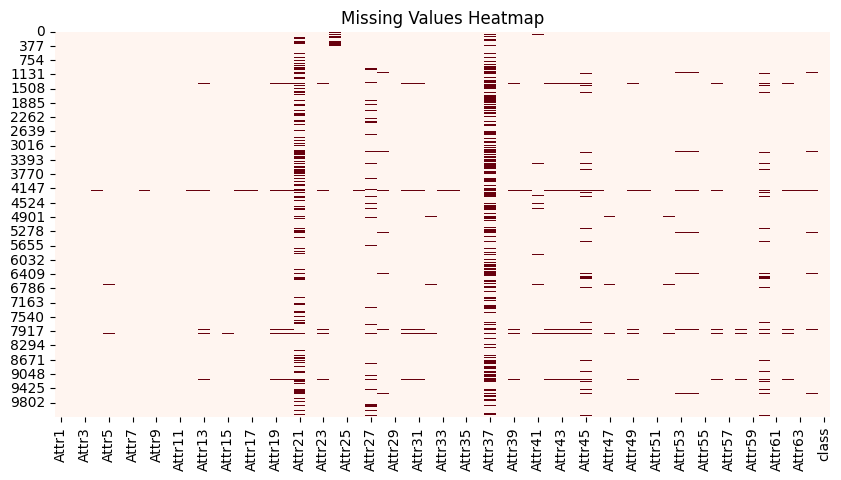

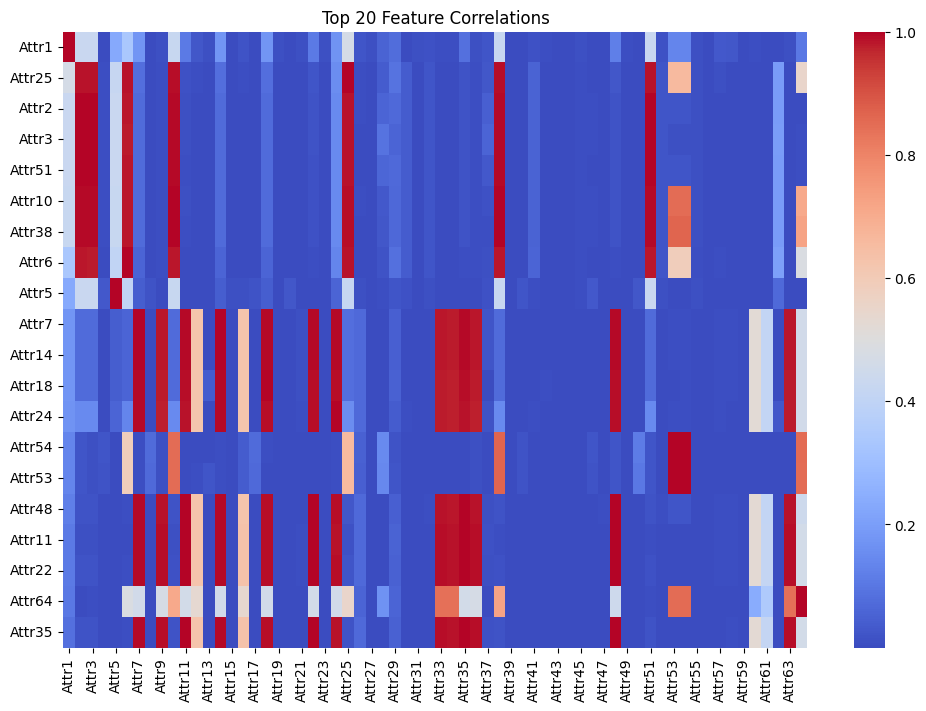

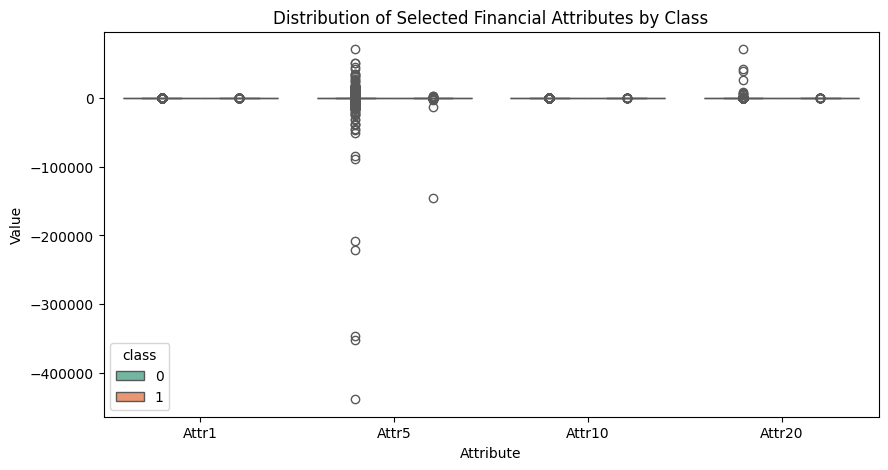

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['2year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (10503, 65)
Number of Missing Values:
 9888


/tmp/ipython-input-1660120595.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


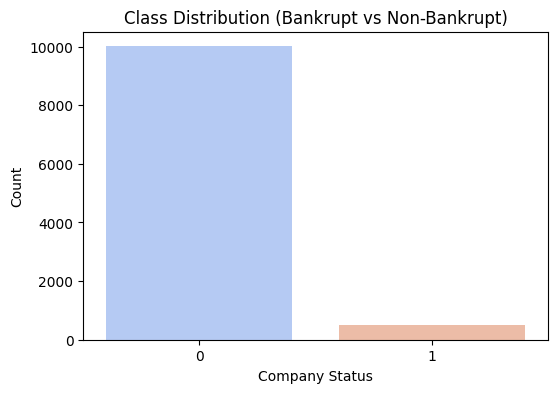

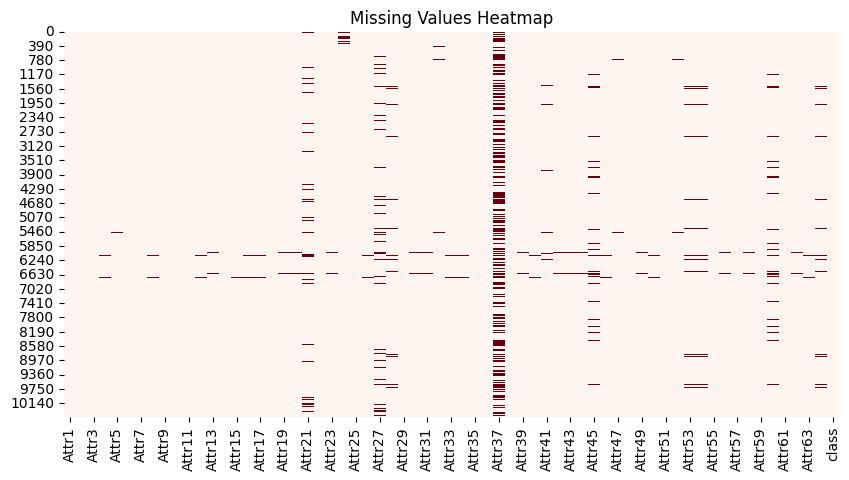

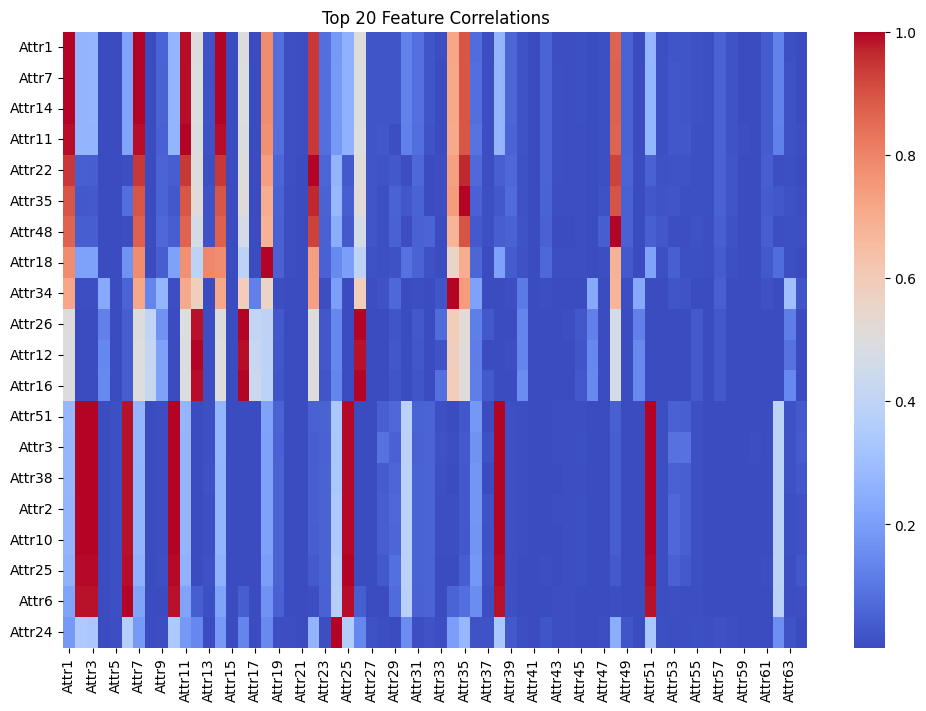

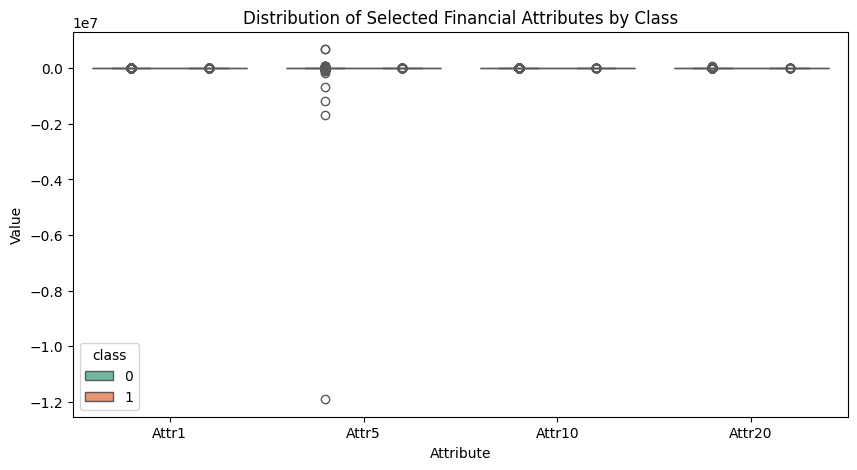

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['3year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (9792, 65)
Number of Missing Values:
 8776


/tmp/ipython-input-4050274266.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


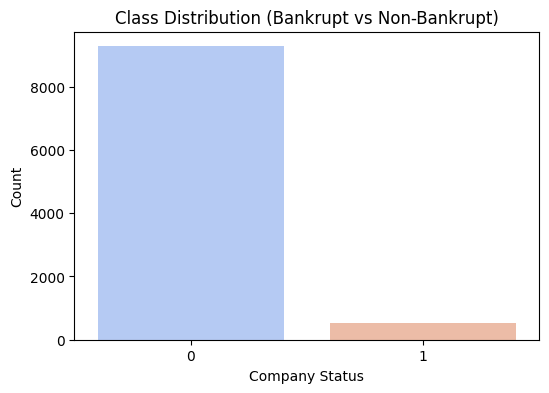

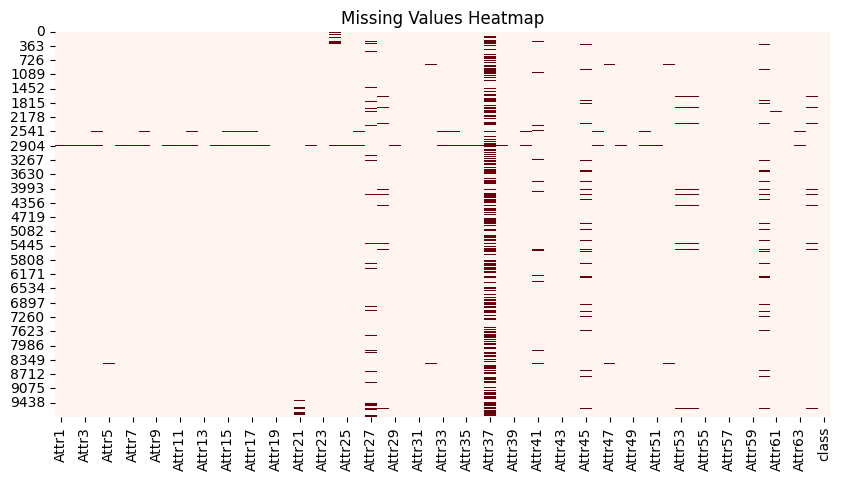

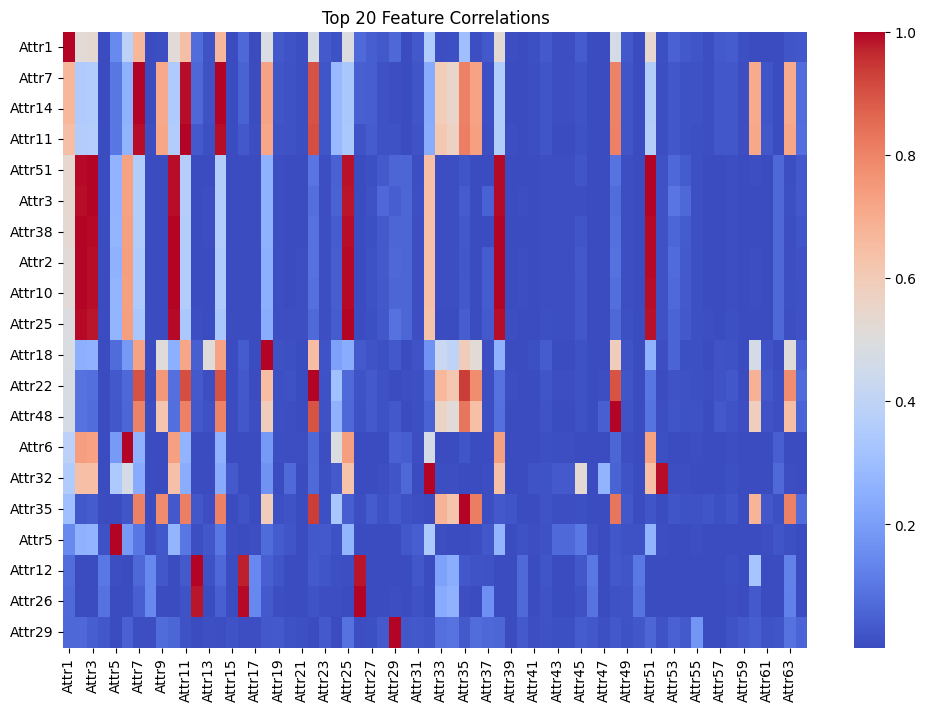

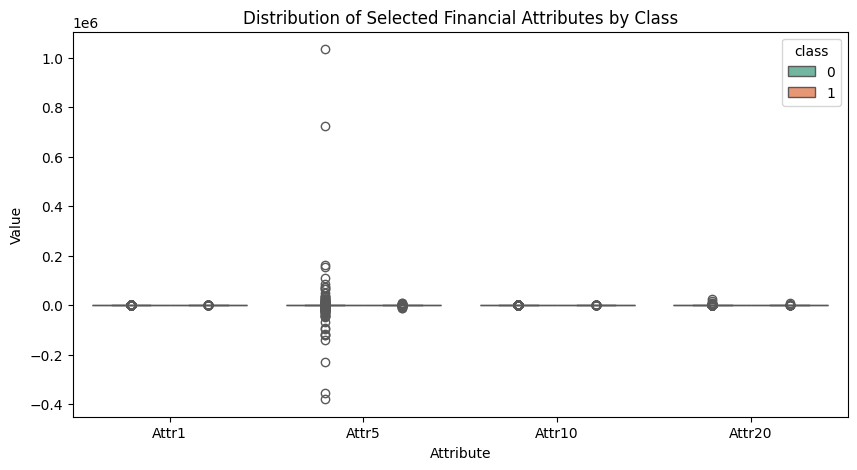

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['4year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (5910, 65)
Number of Missing Values:
 4666


/tmp/ipython-input-2434403198.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


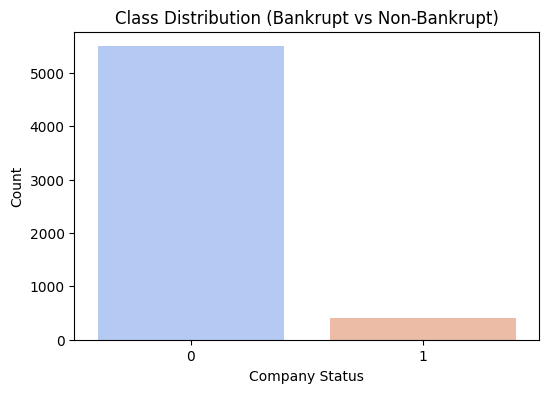

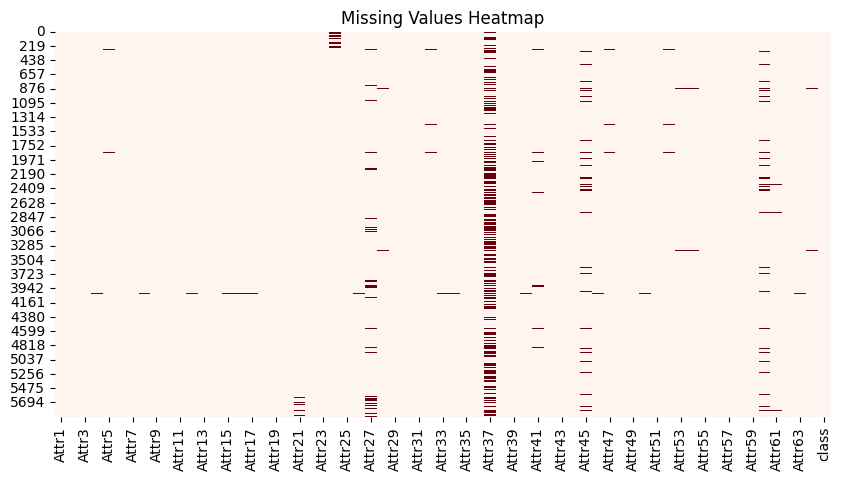

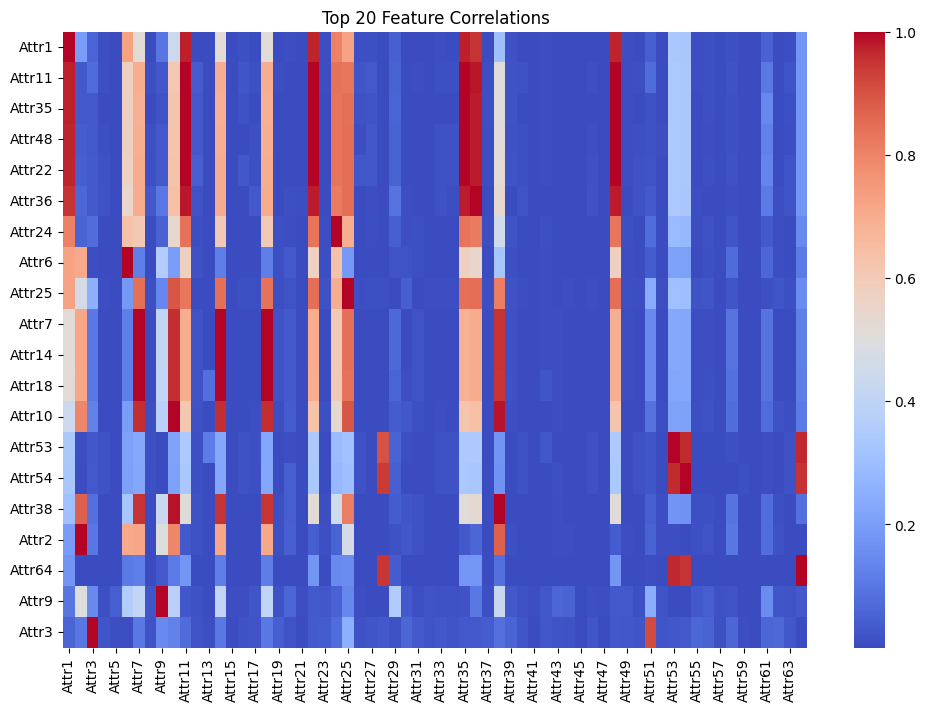

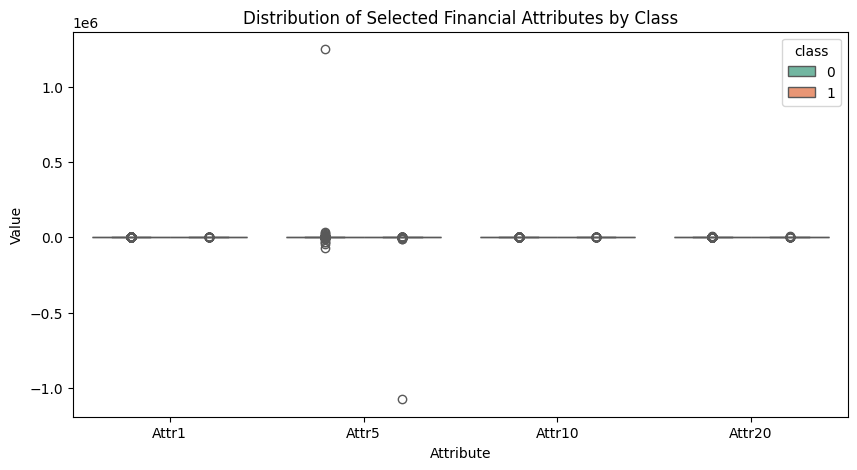

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['5year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


# Data Preparation (Preprocessing & Feature Engineering)

I observed that each feature in the Polish Bankruptcy dataset represents an important financial ratio (like debt ratio, liquidity, and profitability). Even if some values are missing, they still carry meaningful information about a company's financial condition.
So instead of dropping columns with missing data, I decided to impute the missing values using the median.
This helps me keep all 64 financial features for analysis and ensures that no important financial indicator is lost, which is important for understanding feature importance and model interpretability later

In [8]:
# Missing Value Analysis & Imputation

import pandas as pd
from sklearn.impute import SimpleImputer

datasets = {
    "1-Year": dfs["1year"].copy(),
    "2-Year": dfs["2year"].copy(),
    "3-Year": dfs["3year"].copy(),
    "4-Year": dfs["4year"].copy(),
    "5-Year": dfs["5year"].copy()
}

#  Check missing values before imputation
print(" Missing Values Before Imputation:\n")
before_counts = {}
for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    before_counts[name] = missing_count
    print(f"{name} dataset → {missing_count} missing values")

#  Apply median imputation for numeric columns
imputer = SimpleImputer(strategy="median")

for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    datasets[name] = df

#  Verify missing values after imputation
print("\n Missing Values After Imputation:\n")
after_counts = {}
for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    after_counts[name] = missing_count
    print(f"{name} dataset → {missing_count} missing values")

#  Displaying before-after summary table
before_after = pd.DataFrame({
    "Dataset": list(datasets.keys()),
    "Before Imputation": list(before_counts.values()),
    "After Imputation": list(after_counts.values())
})

print("\n Before vs After Imputation Summary:\n")
display(before_after)


 Missing Values Before Imputation:

1-Year dataset → 5835 missing values
2-Year dataset → 12157 missing values
3-Year dataset → 9888 missing values
4-Year dataset → 8776 missing values
5-Year dataset → 4666 missing values

 Missing Values After Imputation:

1-Year dataset → 0 missing values
2-Year dataset → 0 missing values
3-Year dataset → 0 missing values
4-Year dataset → 0 missing values
5-Year dataset → 0 missing values

 Before vs After Imputation Summary:



,Dataset,Before Imputation,After Imputation
0,1-Year,5835,0
1,2-Year,12157,0
2,3-Year,9888,0
3,4-Year,8776,0
4,5-Year,4666,0


I observed that each year's dataset contained a different number of missing values across the financial attributes.
To preserve all important financial indicators, I decided not to drop any columns but instead applied median imputation.
After imputation, all missing values were successfully filled, resulting in complete datasets for all 1 - 5 year files.
This ensures consistent input quality for model training and fair comparison across forecasting horizons.

# Class Imbalance Handling

I observed that the bankruptcy datasets are highly imbalanced, with far fewer bankrupt companies compared to non-bankrupt ones.
To prevent bias in the machine learning models and ensure fair learning, I applied SMOTE to oversample the minority (bankrupt) class.
After balancing, both classes have approximately equal representation in the training data, improving model generalization.

Handle Class Imbalance -SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

Feature Scaling (StandardScaler or MinMaxScaler)

Optional Outlier Removal

Feature Engineering (Ratios, Log Transform, etc.)

Feature Selection (RFE, PCA, SHAP)


I observed that a few rows had missing target (class) values. Since these samples do not provide any bankruptcy status label, I dropped them to ensure the model trains only on valid labeled data. This step does not affect feature information, as all financial attributes were previously imputed using the median strategy.

In [9]:
# checking 1 year missing data

df = dfs['1year'].copy()

# Decode bytes
if df['class'].dtype == 'object' or isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Converting class to numeric (0 or 1)
df['class'] = df['class'].astype(float)

# Checking unique values
print("Unique target values:", df['class'].unique())
print("Number of NaNs in target:", df['class'].isna().sum())


Unique target values: [0. 1.]
Number of NaNs in target: 0


Class distribution before SMOTE: Counter({0: 6756, 1: 271})
Class distribution after SMOTE: Counter({0: 5404, 1: 5404})


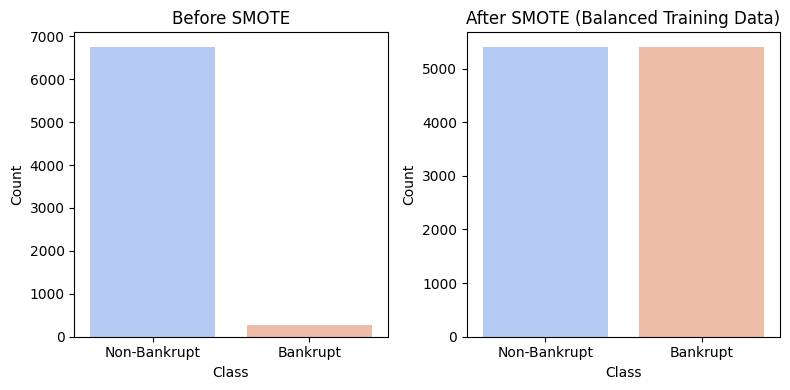

In [10]:
# Handling Class Imbalance (SMOTE)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Select the cleaned dataset
df_bal = datasets['1-Year'].copy()

# Decode bytes if necessary
if isinstance(df_bal['class'].iloc[0], bytes):
    df_bal['class'] = df_bal['class'].str.decode('utf-8')

# Convert target column to integer (0 or 1)
df_bal['class'] = df_bal['class'].astype(float).astype(int)

# Separate features and target
X = df_bal.drop('class', axis=1)
y = df_bal['class']

# Check initial class balance
print("Class distribution before SMOTE:", Counter(y))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check class balance after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_res))

#  Visualization
plt.figure(figsize=(8,4))

# Before SMOTE
plt.subplot(1,2,1)
sns.barplot(x=['Non-Bankrupt', 'Bankrupt'],
            y=list(Counter(y).values()),
            hue=['Non-Bankrupt', 'Bankrupt'],
            palette="coolwarm", legend=False)
plt.title("Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1,2,2)
sns.barplot(x=['Non-Bankrupt', 'Bankrupt'],
            y=list(Counter(y_train_res).values()),
            hue=['Non-Bankrupt', 'Bankrupt'],
            palette="coolwarm", legend=False)
plt.title("After SMOTE (Balanced Training Data)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Outlier Detection & Treatment

Summary BEFORE outlier treatment:
            mean           std         min         max
Attr1   0.029029      3.633901    -256.890      94.280
Attr2   0.574511      0.813860     -72.162      21.261
Attr3   0.116860      0.412586     -21.234       1.000
Attr4   2.554616     12.887875       0.000    1017.800
Attr5  83.564696  14298.873955 -634140.000  990900.000

Summary AFTER outlier treatment:
            mean        std         min         max
Attr1   0.067263   0.114040   -0.176375    0.310416
Attr2   0.565997   0.280694   -0.231814    1.335622
Attr3   0.131767   0.278024   -0.568255    0.855389
Attr4   1.695390   1.077739    0.000000    4.059161
Attr5 -17.101225  77.987969 -179.071048  148.182229


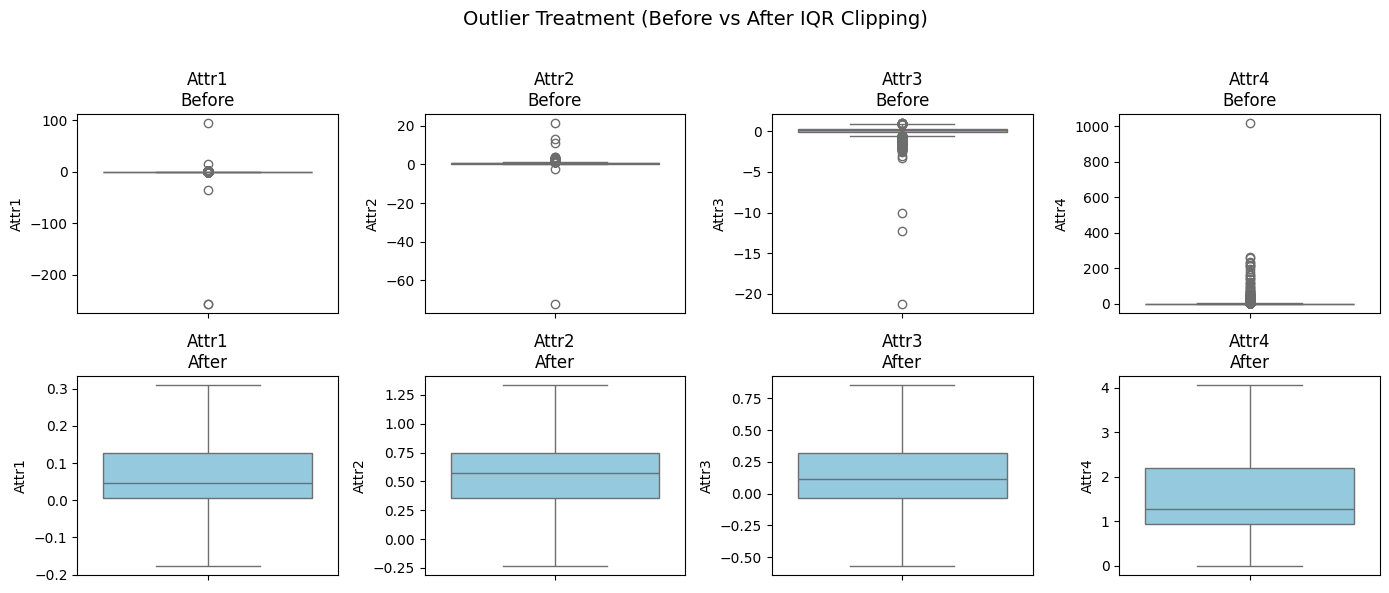

In [11]:
#  Outlier Detection & Treatment (IQR Method + Visualization)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Working on SMOTE-balanced training data
X_train_out = X_train_res.copy()

#  Summary before clipping
print("Summary BEFORE outlier treatment:")
print(X_train_out.describe().T[['mean', 'std', 'min', 'max']].head(5))

#  IQR-based clipping
for col in X_train_out.columns:
    Q1 = X_train_out[col].quantile(0.25)
    Q3 = X_train_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train_out[col] = np.clip(X_train_out[col], lower_bound, upper_bound)

# Summary after clipping
print("\nSummary AFTER outlier treatment:")
print(X_train_out.describe().T[['mean', 'std', 'min', 'max']].head(5))

#  Quick visualization for a few numerical columns
numeric_cols = X_train_out.select_dtypes(include=[np.number]).columns[:4]

plt.figure(figsize=(14, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=X_train_res[col], color='salmon')
    plt.title(f"{col}\nBefore")

    plt.subplot(2, 4, i+4)
    sns.boxplot(y=X_train_out[col], color='skyblue')
    plt.title(f"{col}\nAfter")

plt.suptitle("Outlier Treatment (Before vs After IQR Clipping)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



I observed that several financial attributes (like Attr1, Attr4, and Attr5) had extreme outlier values before treatment for example, Attr5 ranged from 634,140 to 990,900, indicating possible data entry or scale distortions.

To make the dataset more stable and suitable for modeling, I applied IQR-based clipping, which limits values outside 1.5x the interquartile range.

After clipping:

The standard deviation of most attributes decreased sharply (e.g, Attr5 from 14,298 → 78),

The range of values became more realistic and consistent,

The overall data distribution became tighter and less skewed, improving model robustness.

This ensures that extreme values don't dominate the learning process and helps models like Logistic Regression, SVM, or KNN perform better.

# Feature Scaling


Summary BEFORE Scaling (Training Data):
      Attr1  Attr2  Attr3  Attr4    Attr5  Attr6  Attr7  Attr8  Attr9  Attr10  \
mean  0.067  0.566  0.132  1.695  -17.101  0.020  0.083  1.297  1.717   0.409   
std   0.114  0.281  0.278  1.078   77.988  0.075  0.133  1.360  0.930   0.283   
min  -0.176 -0.232 -0.568  0.000 -179.071 -0.097 -0.208 -1.993  0.000  -0.343   
max   0.310  1.336  0.855  4.059  148.182  0.151  0.370  4.207  3.915   1.195   

      ...    Attr55  Attr56  Attr57  Attr58  Attr59  Attr60  Attr61   Attr62  \
mean  ...  1737.328   0.067   0.176   0.933   0.191  15.490   8.758   92.968   
std   ...  4225.848   0.097   0.275   0.093   0.305  12.231   4.935   57.851   
min   ... -6119.306  -0.146  -0.421   0.732  -0.484   0.014   0.000    0.000   
max   ...  9641.504   0.278   0.766   1.139   0.807  41.570  20.252  229.636   

      Attr63  Attr64  
mean   5.829   8.238  
std    3.651   7.523  
min    0.000   0.000  
max   14.117  23.727  

[4 rows x 64 columns]

Summary AFTER

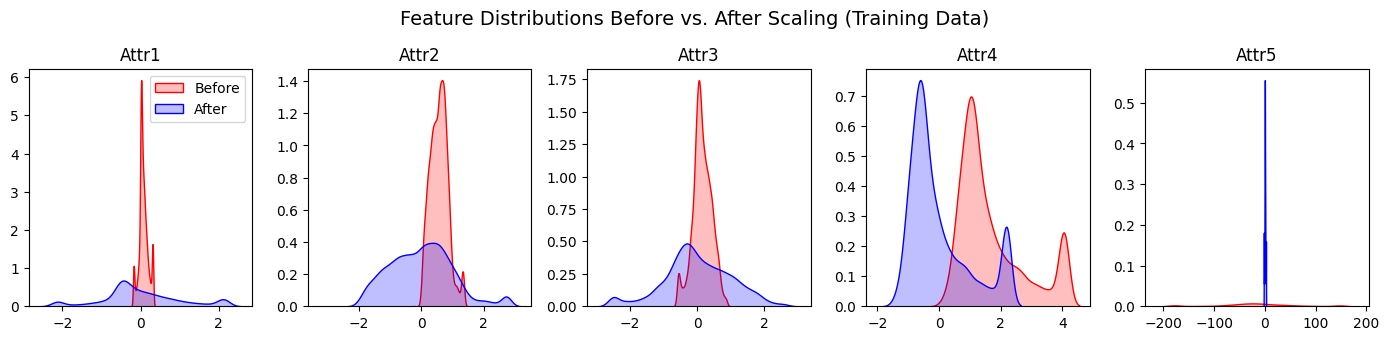

In [12]:
#  Feature Scaling (StandardScaler)

from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using the outlier-treated training features
X_train_scaled = X_train_out.copy()

# Separate features (X) and target (y) - target is not scaled
y_train_scaled = y_train_res.copy()

#  Before Scaling Summary (Training data)
print("\nSummary BEFORE Scaling (Training Data):")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(3))

#  Applying StandardScaler to training features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_scaled),
    columns=X_train_scaled.columns,
    index=X_train_scaled.index
)

# Scaling the test features using the scaler fitted on training data
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


# After Scaling Summary (Training data)
print("\nSummary AFTER Scaling (Training Data):")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(3))

#  Visualization: Before vs After Scaling (Training data)
plt.figure(figsize=(14, 6))

# Selecting a few representative attributes for visual clarity
features_to_plot = X_train_out.columns[:5]

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 5, i)
    sns.kdeplot(X_train_out[col], label='Before', color='red', fill=True)
    sns.kdeplot(X_train_scaled[col], label='After', color='blue', fill=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    if i == 1:
        plt.legend()

plt.suptitle("Feature Distributions Before vs. After Scaling (Training Data)", fontsize=14)
plt.tight_layout()
plt.show()

## Feature Selection using RFE (Recursive Feature Elimination)

Total number of features in dataset: 64

Top 20 Features Selected by RFE:

   Feature  Rank
3    Attr4     1
7    Attr8     1
12  Attr13     1
31  Attr32     1
23  Attr24     1
22  Attr23     1
18  Attr19     1
19  Attr20     1
51  Attr52     1
41  Attr42     1
46  Attr47     1
45  Attr46     1
37  Attr38     1
38  Attr39     1
34  Attr35     1
32  Attr33     1
62  Attr63     1
55  Attr56     1
61  Attr62     1
57  Attr58     1


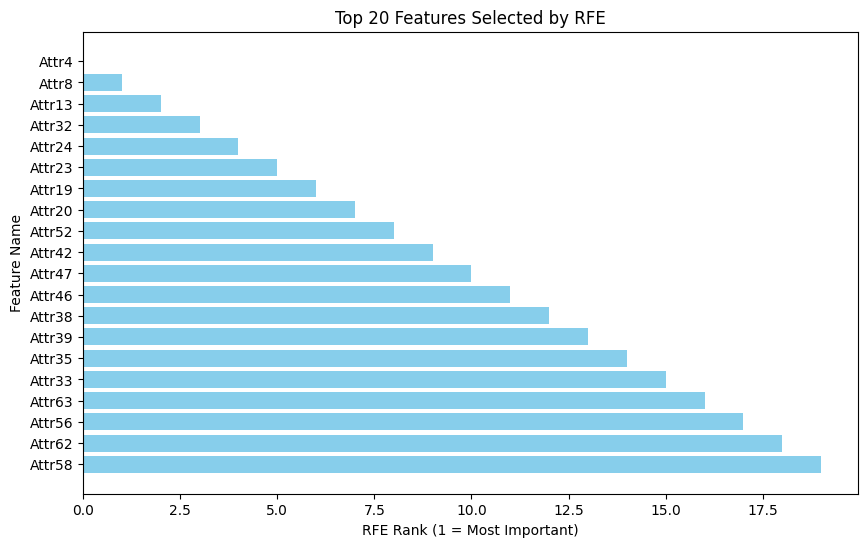

In [13]:
#  Feature Selection using RFE (Recursive Feature Elimination)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# Checking how many features exist in the dataset
print(f"Total number of features in dataset: {X_train_scaled.shape[1]}")

# Initialize the model (Logistic Regression for interpretability)
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Applying RFE to select top 20 features
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train_scaled, y_train_res)

#  rankings and selected features
feature_ranks = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Rank': rfe.ranking_
}).sort_values(by='Rank')

# Displaying top 20 features
top_features = feature_ranks.head(20)
print("\nTop 20 Features Selected by RFE:\n")
print(top_features)

#  RFE Feature Importance
plt.figure(figsize=(10,6))
plt.barh(top_features['Feature'], range(len(top_features)), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 20 Features Selected by RFE")
plt.xlabel("RFE Rank (1 = Most Important)")
plt.ylabel("Feature Name")
plt.show()


I observed that the dataset had 64 financial features, so I used Recursive Feature Elimination (RFE) with a Logistic Regression model to identify the most important ones.
RFE ranked each feature based on its contribution to predicting bankruptcy. From this process, I selected the top 20 key financial ratios that carry the strongest predictive power.
This helps reduce noise, improve model accuracy, and focus on the most relevant indicators for bankruptcy prediction.

#PCA (Principal Component Analysis)

Total original features: 64
Number of PCA components retained: 22
Total variance explained: 95.05%


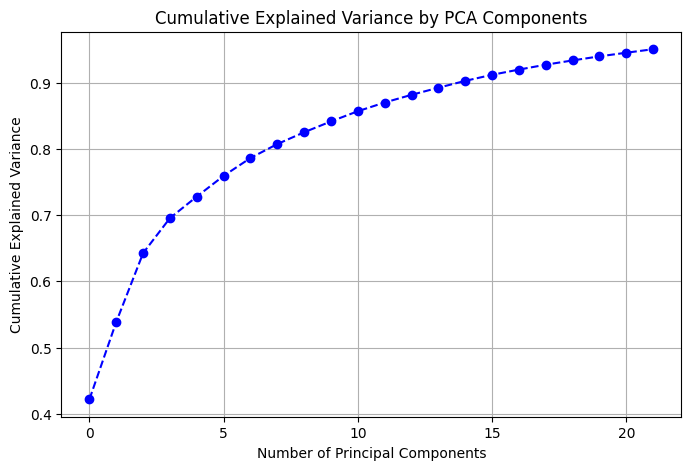

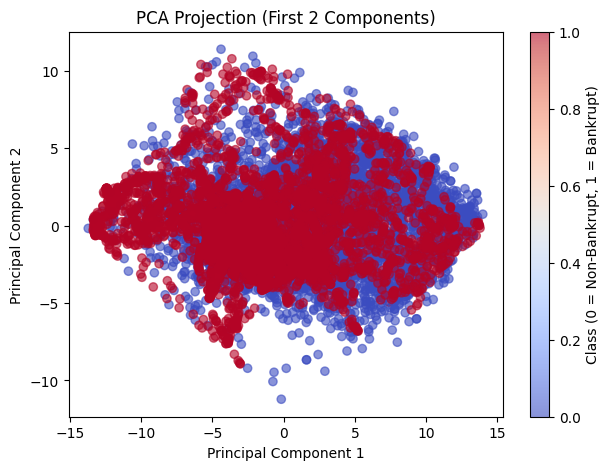

In [14]:
# PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA - keep 95% of explained variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print summary
print(f"Total original features: {X_train_scaled.shape[1]}")
print(f"Number of PCA components retained: {pca.n_components_}")
print(f"Total variance explained: {cumulative_variance[-1]*100:.2f}%")

#Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#2D PCA Scatter Plot (first 2 components)
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train_res, cmap='coolwarm', alpha=0.6)
plt.title('PCA Projection (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Non-Bankrupt, 1 = Bankrupt)')
plt.show()


PCA (Principal Component Analysis) Summary

I applied PCA on the scaled 1-Year dataset to reduce feature dimensionality while keeping most of the information.
The analysis showed that 22 components explain about 95% of the total data variance, meaning we can simplify the dataset without losing important patterns.
This step helps reduce noise, speed up model training, and prevent overfitting in the next phase (model building).

# Model Building and Evaluation

In [15]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


[LightGBM] [Info] Number of positive: 5404, number of negative: 5404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 10808, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model Performance Comparison:

      Model  Accuracy  Precision    Recall  F1-Score       AUC
0   XGBoost  0.927454   0.100000  0.111111  0.105263  0.665879
1  LightGBM  0.906117   0.110000  0.203704  0.142857  0.675262
2  CatBoost  0.925320   0.107692  0.129630  0.117647  0.644498


<Figure size 800x500 with 0 Axes>

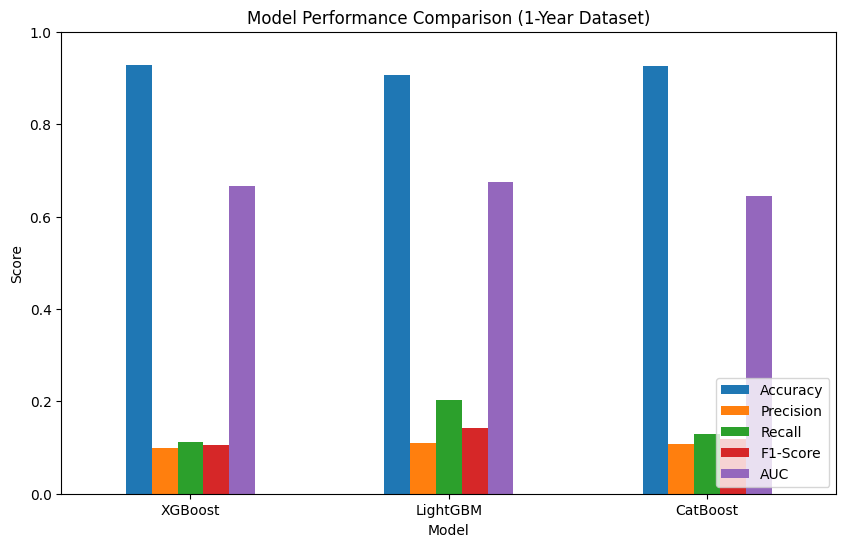

In [16]:
#  Model Building and Evaluation

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Use PCA-transformed data for training
X_train_final = X_train_pca
X_test_final = X_test_pca

#  Define Models
models = {
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

#  Train & Evaluate
results = []
for name, model in models.items():
    model.fit(X_train_final, y_train_res)
    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })

#  Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df)

#  Visualization
plt.figure(figsize=(8,5))
results_df.plot(
    x='Model',
    y=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    kind='bar',
    figsize=(10,6)
)
plt.title("Model Performance Comparison (1-Year Dataset)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


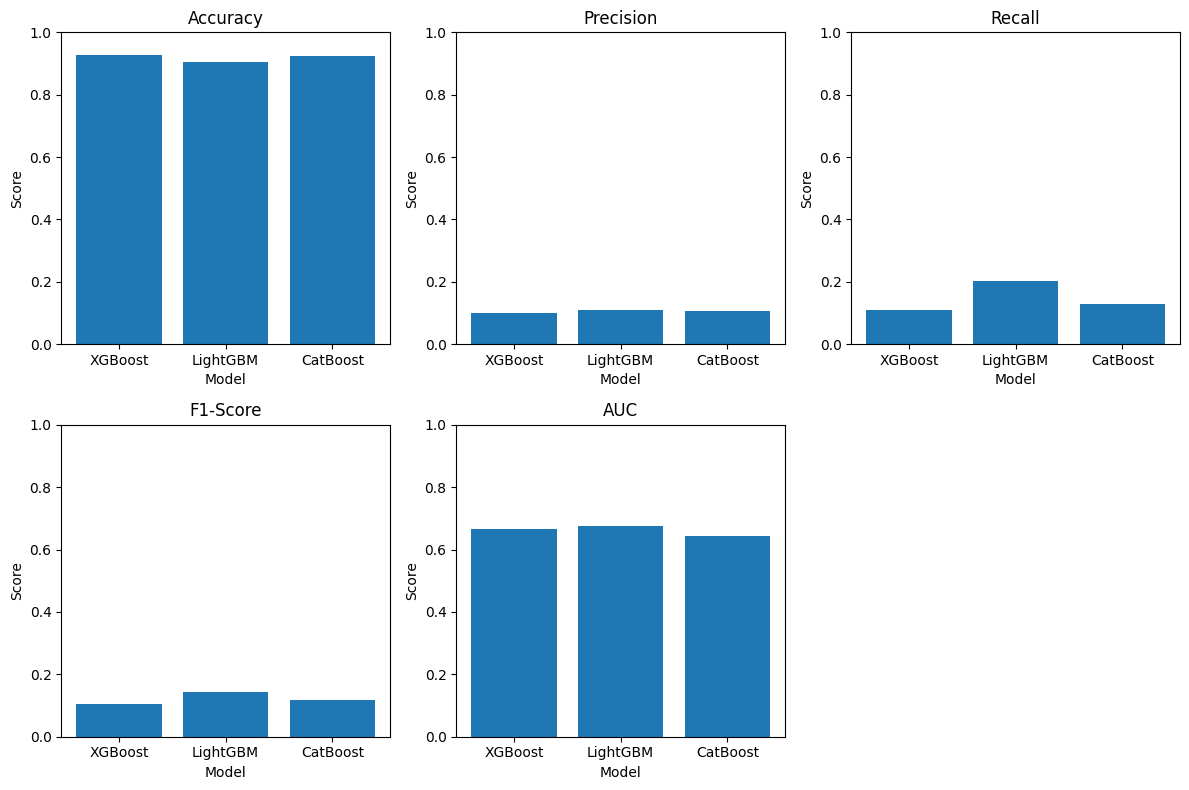

In [17]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(results_df["Model"], results_df[metric])
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xlabel("Model")
    plt.ylabel("Score")

plt.tight_layout()
plt.show()


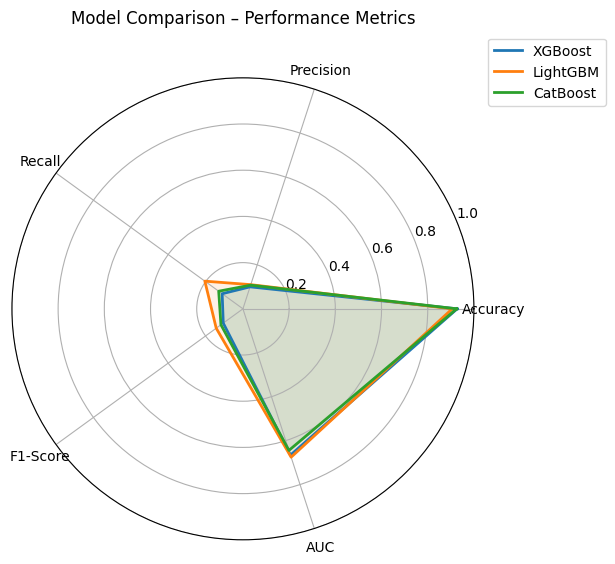

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
labels = list(results_df.columns[1:])
num_vars = len(labels)

# Compute angle for each metric
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the radar
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in results_df.iterrows():
    values = row[1:].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model'], linewidth=2)
    ax.fill(angles, values, alpha=0.1)

ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Model Comparison – Performance Metrics", y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Observation:

All models achieve high overall accuracy (~92%) but have low recall (few bankrupt firms detected).

LightGBM slightly outperforms others in Recall and AUC better at identifying bankrupt companies.

# Model Explainability using SHAP

SHAP ANALYSIS FOR BANKRUPTCY PREDICTION MODEL

[1/5] Generating SHAP Summary Plots...
 SHAP values shape: (1406, 22)
 Number of test samples: 1406
 Number of features: 22


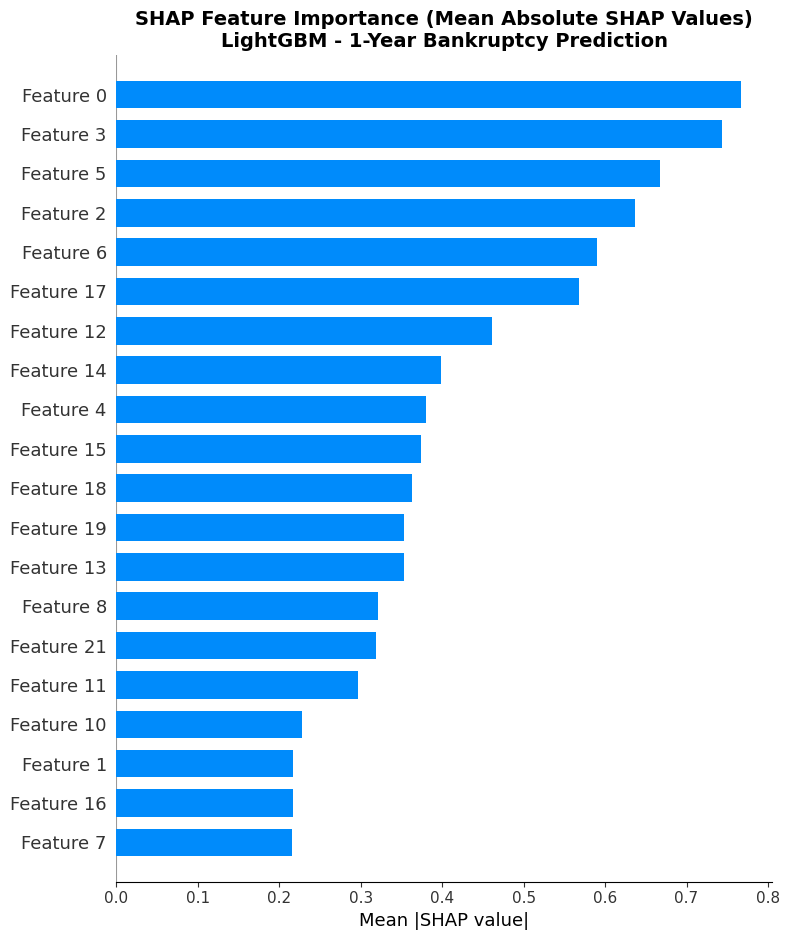

 Summary bar plot saved as 'shap_summary_bar.png'


In [19]:
#SHAP Analysis for Bankruptcy Prediction


#  Import Required Libraries
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("SHAP ANALYSIS FOR BANKRUPTCY PREDICTION MODEL")

#  SHAP Summary Plot (Global Feature Importance)

print("\n[1/5] Generating SHAP Summary Plots...")

# Initialize SHAP explainer for LightGBM model
explainer = shap.TreeExplainer(model)
# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test_final)

# Handle binary classification (shap_values returns list of arrays)
if isinstance(shap_values, list):
    shap_values_class1 = shap_values[1]
else:
    shap_values_class1 = shap_values

print(f" SHAP values shape: {shap_values_class1.shape}")
print(f" Number of test samples: {X_test_final.shape[0]}")
print(f" Number of features: {X_test_final.shape[1]}")

# SHAP Summary Plot (Bar Chart) - Mean Absolute SHAP Values
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_class1, X_test_final, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean Absolute SHAP Values)\nLightGBM - 1-Year Bankruptcy Prediction",
          fontsize=14, fontweight='bold')
plt.xlabel("Mean |SHAP value|")
plt.tight_layout()
plt.savefig('shap_summary_bar.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Summary bar plot saved as 'shap_summary_bar.png'")


[2/5] Generating SHAP Beeswarm Plot...


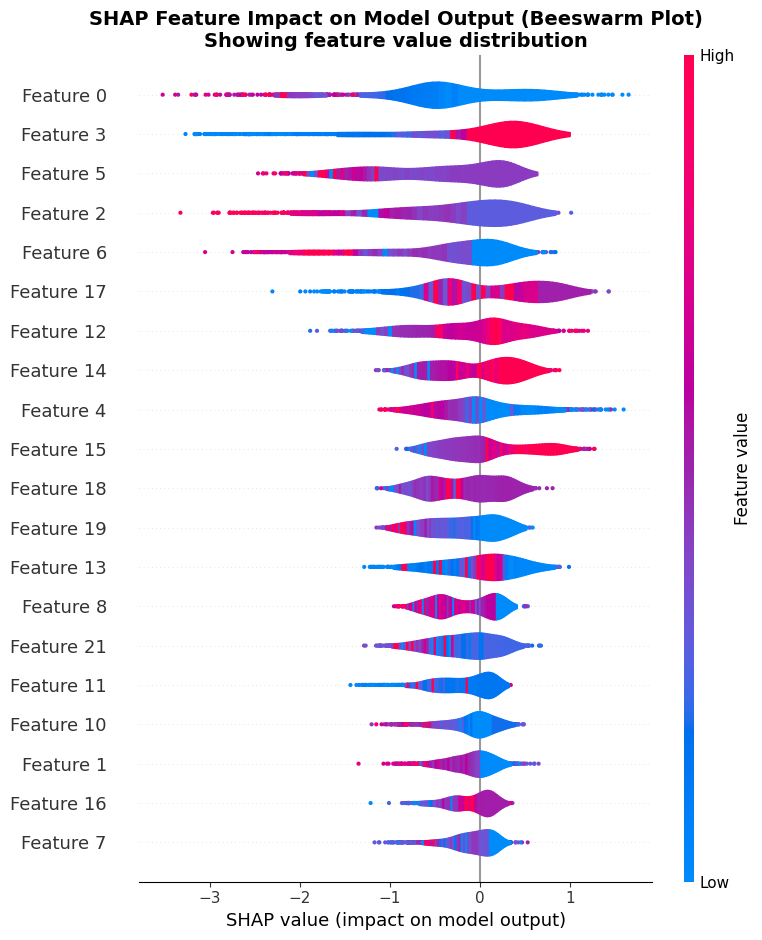

 Beeswarm plot saved as 'shap_beeswarm_plot.png'


In [21]:
# SHAP Beeswarm Plot (Detailed Feature Distribution)

print("\n[2/5] Generating SHAP Beeswarm Plot...")

# Create figure
plt.figure(figsize=(12, 8))


# SHAP Beeswarm/Violin Plot
shap.summary_plot(shap_values_class1, X_test_final, plot_type="violin", show=False)

plt.title(
    "SHAP Feature Impact on Model Output (Beeswarm Plot)\nShowing feature value distribution",
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.savefig('shap_beeswarm_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Beeswarm plot saved as 'shap_beeswarm_plot.png'")



[3/5] Generating SHAP Dependence Plots for Top Features
Generating dependence plot for: PC_0


<Figure size 800x600 with 0 Axes>

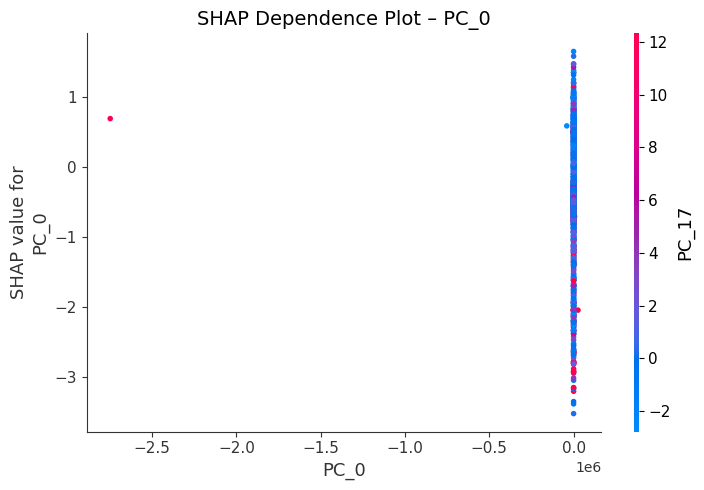

Generating dependence plot for: PC_3


<Figure size 800x600 with 0 Axes>

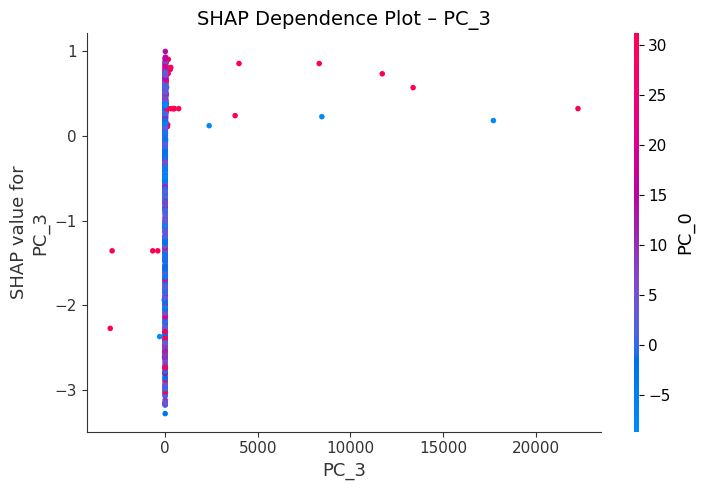

Generating dependence plot for: PC_5


<Figure size 800x600 with 0 Axes>

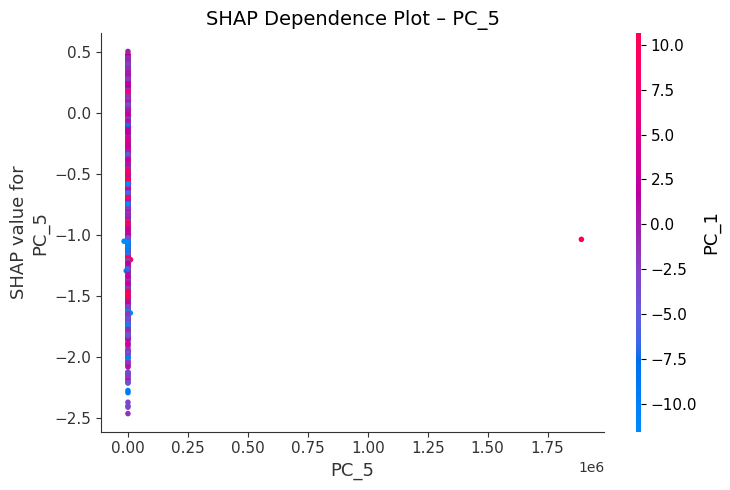

Generating dependence plot for: PC_2


<Figure size 800x600 with 0 Axes>

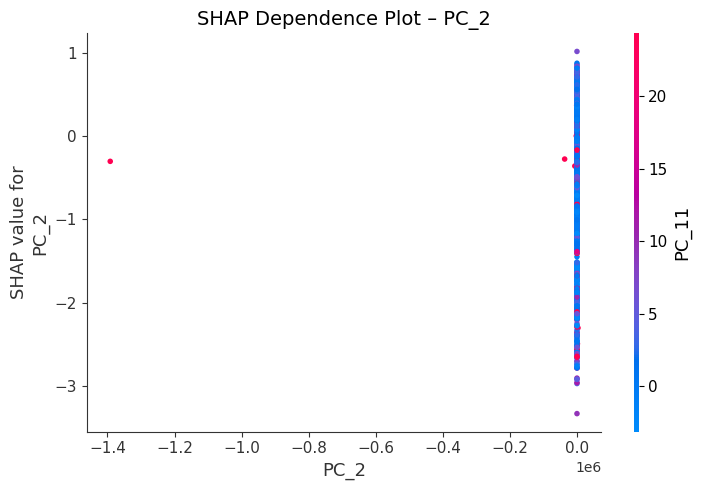

Generating dependence plot for: PC_6


<Figure size 800x600 with 0 Axes>

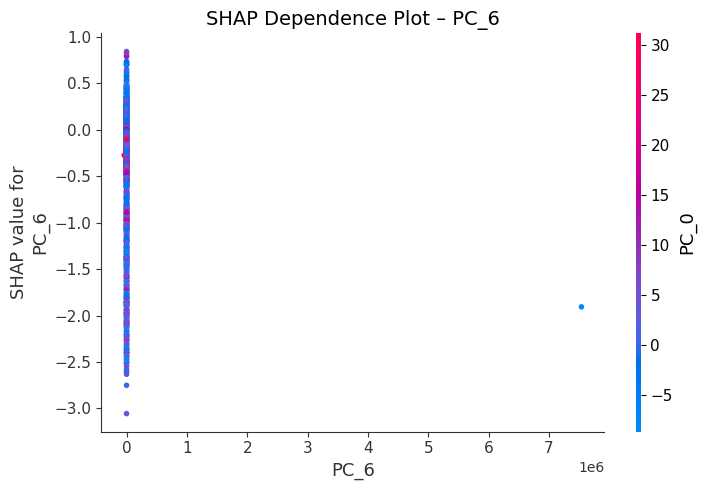

Generating dependence plot for: PC_17


<Figure size 800x600 with 0 Axes>

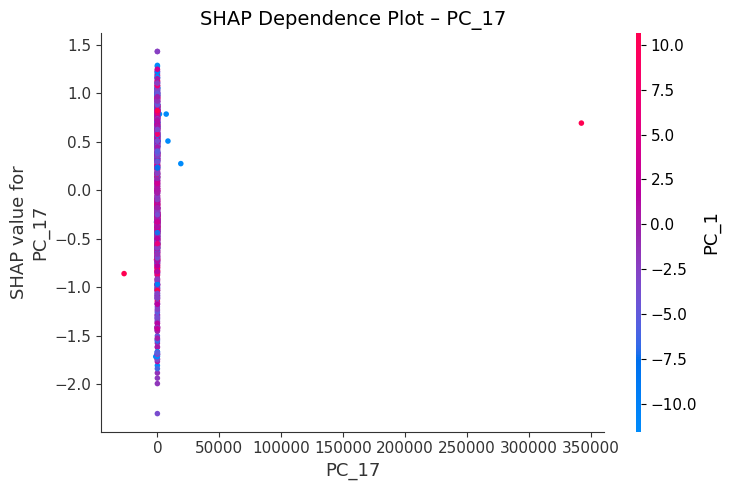


Saved 6 clean SHAP dependence plots.


In [26]:
##SHAP Dependence Plots (Top 6 Features)

print("\n[3/5] Generating SHAP Dependence Plots for Top Features")

#  Compute feature importance
feature_importance = np.abs(shap_values_class1).mean(axis=0)

#  Identify the top 6 most important features
top_features_idx = np.argsort(feature_importance)[-6:][::-1]

# Create PCA component names
feature_names = [f"PC_{i}" for i in range(X_test_final.shape[1])]

#  Convert numpy → DataFrame if needed
if isinstance(X_test_final, np.ndarray):
    X_test_final = pd.DataFrame(X_test_final, columns=feature_names)

#  Generate 6 separate dependence plots
for i, feature_idx in enumerate(top_features_idx):
    feature_name = feature_names[feature_idx]
    print(f"Generating dependence plot for: {feature_name}")

    plt.figure(figsize=(8, 6))
    shap.dependence_plot(
        feature_idx,
        shap_values_class1,
        X_test_final,
        feature_names=feature_names,
        show=False
    )

    plt.title(f"SHAP Dependence Plot – {feature_name}", fontsize=14)
    plt.tight_layout()

    # Save separately
    plt.savefig(f"shap_dependence_plot_{feature_name}.png", dpi=300, bbox_inches="tight")
    plt.show()

print("\nSaved 6 SHAP dependence plots.")



[5/5] Generating SHAP Waterfall Plots


100%|===================| 1403/1406 [02:57<00:00]       

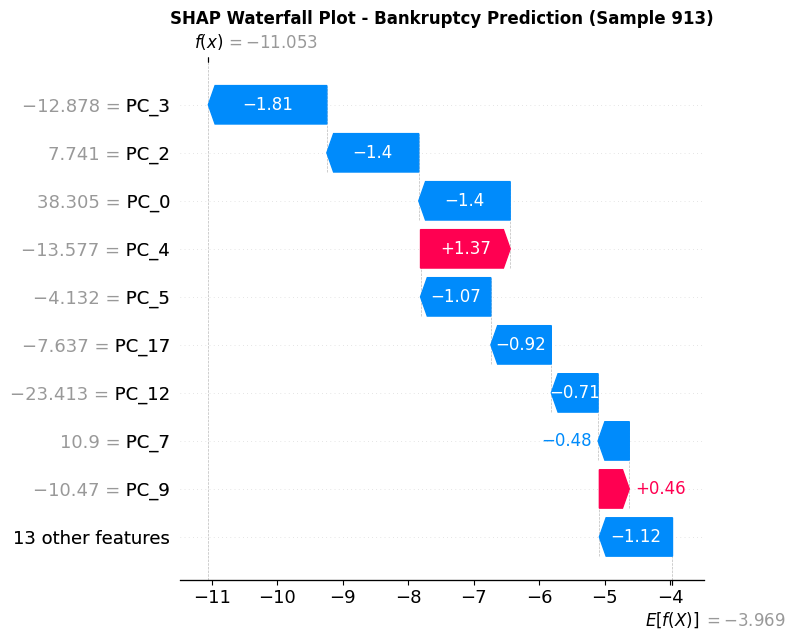

 Waterfall plot (bankruptcy case) saved as 'shap_waterfall_bankruptcy.png'


In [27]:
#  SHAP Waterfall Plot

print("\n[5/5] Generating SHAP Waterfall Plots")

# Create Explanation objects for waterfall plots
explainer_obj = shap.Explainer(model, X_test_final)
shap_values_df = explainer_obj(X_test_final)

# Waterfall plot for bankruptcy case
plt.figure(figsize=(10, 6))
shap.plots.waterfall(shap_values_df[bankrupt_idx], show=False)
plt.title(f"SHAP Waterfall Plot - Bankruptcy Prediction (Sample {bankrupt_idx})",
          fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_waterfall_bankruptcy.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Waterfall plot (bankruptcy case) saved as 'shap_waterfall_bankruptcy.png'")


[BONUS] Feature Importance Summary Table
Feature  Mean |SHAP|  Rank
   PC_0     0.766636     1
   PC_3     0.743577     2
   PC_5     0.666938     3
   PC_2     0.636967     4
   PC_6     0.589646     5
  PC_17     0.568515     6
  PC_12     0.461535     7
  PC_14     0.398544     8
   PC_4     0.379718     9
  PC_15     0.374093    10
  PC_18     0.362564    11
  PC_19     0.353526    12
  PC_13     0.352615    13
   PC_8     0.321468    14
  PC_21     0.318418    15

SHAP ANALYSIS COMPLETE!
 Feature importance saved to 'shap_feature_importance.csv'

[ADVANCED] Calculating SHAP Interaction Values...


<Figure size 1000x600 with 0 Axes>

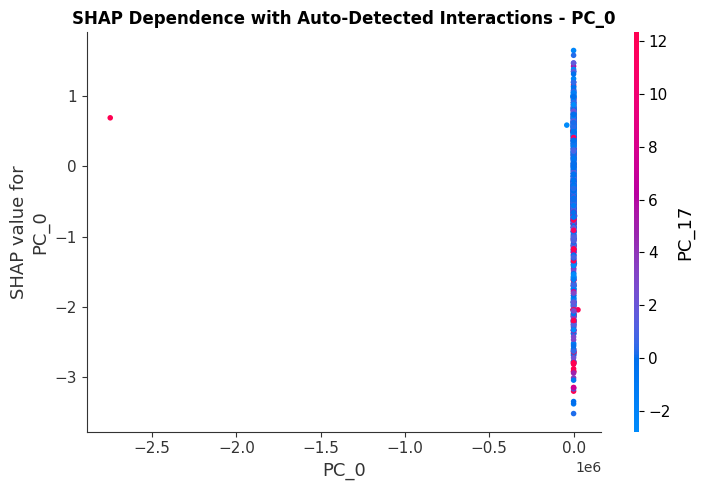

<Figure size 1000x600 with 0 Axes>

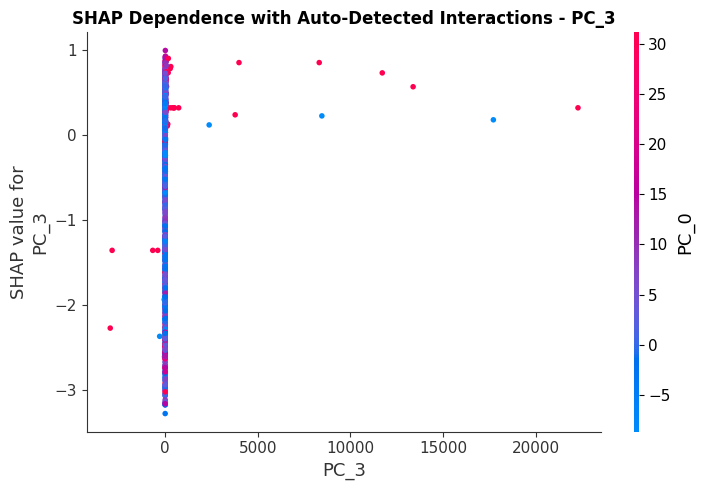

<Figure size 1000x600 with 0 Axes>

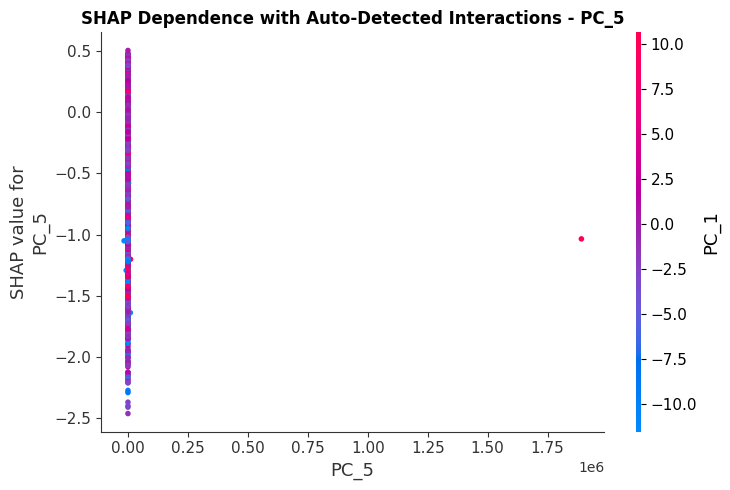

 Interaction plots saved

[INSIGHTS] Key Findings from SHAP Analysis:

Top 5 Most Important Features (by Mean |SHAP| value):
  1. PC_0       - Mean |SHAP| = 0.766636
  2. PC_3       - Mean |SHAP| = 0.743577
  3. PC_5       - Mean |SHAP| = 0.666938
  4. PC_2       - Mean |SHAP| = 0.636967
  5. PC_6       - Mean |SHAP| = 0.589646


SHAP Value Statistics:
  Max SHAP value (any feature): 1.654543
  Min SHAP value (any feature): -3.526838
  Mean SHAP value: -0.169989
  Std Dev SHAP values: 0.553176

  Base Value (Model Expected Output): -0.306098
    (This is the average model output before considering any features)


In [29]:
#Feature Importance Ranking

print("\n[BONUS] Feature Importance Summary Table")


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP|': feature_importance,
    'Rank': range(1, len(feature_importance) + 1)
}).sort_values('Mean |SHAP|', ascending=False).reset_index(drop=True)

importance_df['Rank'] = range(1, len(importance_df) + 1)
print(importance_df.head(15).to_string(index=False))


# Save importance ranking
importance_df.to_csv('shap_feature_importance.csv', index=False)
print(" Feature importance saved to 'shap_feature_importance.csv'")


# Advanced - SHAP Interaction Effects

print("\n[ADVANCED] Calculating SHAP Interaction Values...")

# Calculate interaction values for top 3 features
top_3_features = importance_df.head(3)['Feature'].tolist()
top_3_indices = [int(f.split('_')[1]) for f in top_3_features]

# Create interaction summary
for i, feat_idx in enumerate(top_3_indices):
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feat_idx, shap_values_class1, X_test_final,
                         interaction_index="auto", feature_names=feature_names, show=False)
    plt.title(f"SHAP Dependence with Auto-Detected Interactions - {top_3_features[i]}",
              fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'shap_interaction_{top_3_features[i]}.png', dpi=300, bbox_inches='tight')
    plt.show()

print(" Interaction plots saved")


# Custom Insights & Observations

print("\n[INSIGHTS] Key Findings from SHAP Analysis:")


top_5 = importance_df.head(5)
print("\nTop 5 Most Important Features (by Mean |SHAP| value):")
for idx, row in top_5.iterrows():
    print(f"  {row['Rank']}. {row['Feature']:<10} - Mean |SHAP| = {row['Mean |SHAP|']:.6f}")

# Calculate SHAP statistics
print("\n\nSHAP Value Statistics:")
print(f"  Max SHAP value (any feature): {shap_values_class1.max():.6f}")
print(f"  Min SHAP value (any feature): {shap_values_class1.min():.6f}")
print(f"  Mean SHAP value: {shap_values_class1.mean():.6f}")
print(f"  Std Dev SHAP values: {shap_values_class1.std():.6f}")

# Explain base value
print(f"\n  Base Value (Model Expected Output): {explainer.expected_value:.6f}")
print(f"    (This is the average model output before considering any features)")



Generating SHAP Waterfall Plots 

Bankruptcy Case: sample 1020


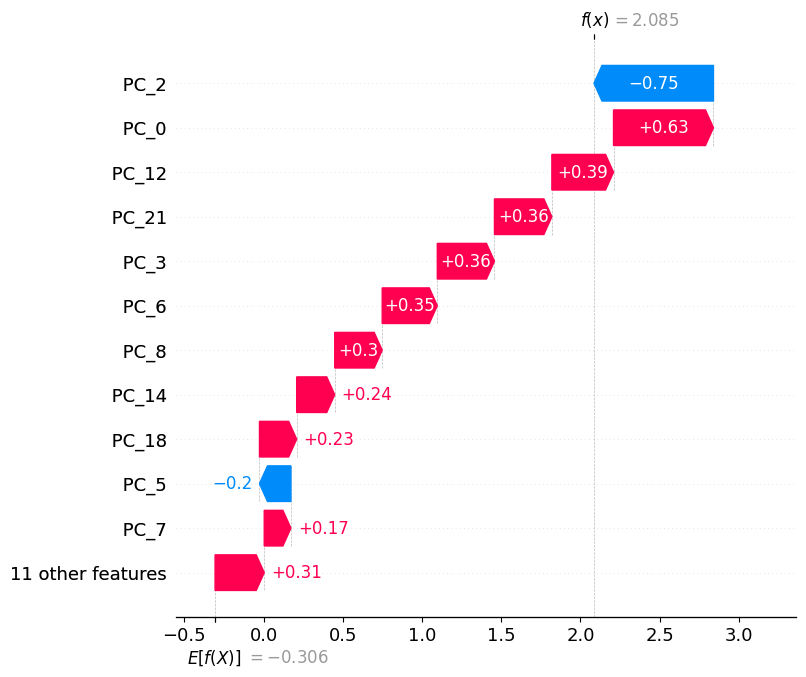


Non-Bankruptcy Case: sample 544


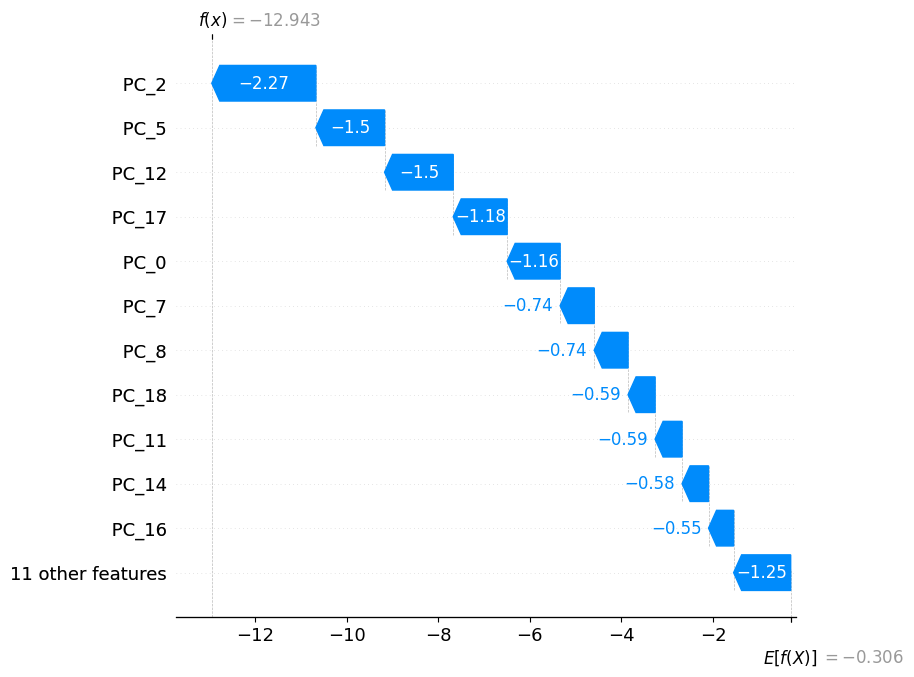


Custom Sample: 0


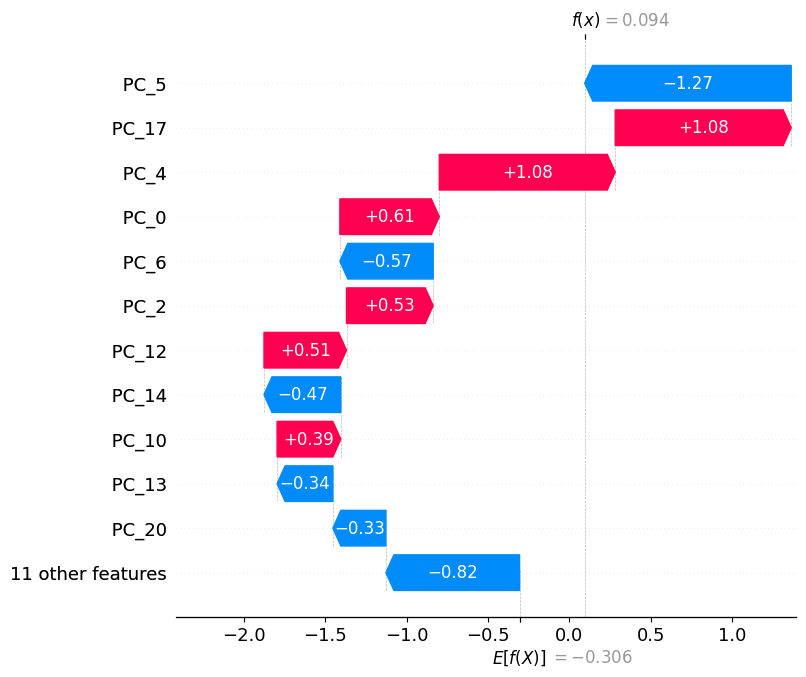

In [33]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("\nGenerating SHAP Waterfall Plots ")

# Use class-1 SHAP values
shap_values_class1 = shap_values[1] if isinstance(shap_values, list) else shap_values

# Create PCA feature names
feature_names = [f"PC_{i}" for i in range(X_test_final.shape[1])]

# Convert numpy → DataFrame
if isinstance(X_test_final, np.ndarray):
    X_test_df = pd.DataFrame(X_test_final, columns=feature_names)
else:
    X_test_df = X_test_final.copy()


#  Highest-risk bankruptcy sample

bankrupt_idx = np.argmax(y_prob)
print(f"\nBankruptcy Case: sample {bankrupt_idx}")

plt.figure(figsize=(10, 6))
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values_class1[bankrupt_idx],
    X_test_df.iloc[bankrupt_idx],
    feature_names=feature_names,
    max_display=12
)
plt.show()


# Lowest-risk non-bankrupt sample

non_bankrupt_idx = np.argmin(y_prob)
print(f"\nNon-Bankruptcy Case: sample {non_bankrupt_idx}")

plt.figure(figsize=(10, 6))
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values_class1[non_bankrupt_idx],
    X_test_df.iloc[non_bankrupt_idx],
    feature_names=feature_names,
    max_display=12
)
plt.show()


# Custom sample

custom_idx = 0
print(f"\nCustom Sample: {custom_idx}")

plt.figure(figsize=(10, 6))
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values_class1[custom_idx],
    X_test_df.iloc[custom_idx],
    feature_names=feature_names,
    max_display=12
)
plt.show()



#model optimization

In [34]:
# Step 1: Baseline Model Training & Evaluation
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Use PCA-transformed data
X_train_final = X_train_pca
X_test_final = X_test_pca

# Define baseline models
models = {
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_final, y_train_res)
    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nBaseline Model Performance:\n")
print(results_df)


[LightGBM] [Info] Number of positive: 5404, number of negative: 5404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 10808, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Baseline Model Performance:

      Model  Accuracy  Precision    Recall  F1-Score       AUC
0   XGBoost  0.927454   0.100000  0.111111  0.105263  0.665879
1  LightGBM  0.906117   0.110000  0.203704  0.142857  0.675262
2  CatBoost  0.925320   0.107692  0.129630  0.117647  0.644498


In [35]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#  XGBoost Hyperparameter Grid
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_final, y_train_res)

print("\nBest XGBoost Parameters:\n")
print(grid_search.best_params_)
print(f"Best CV AUC: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 1458 candidates, totalling 4374 fits


KeyboardInterrupt: 

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 5, 10]
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_final, y_train_res)

# Display results
print("\nBest XGBoost Parameters:\n")
print(random_search.best_params_)
print(f"Best CV AUC: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best XGBoost Parameters:

{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best CV AUC: 0.9931



Optimized Model Performance:

               Model  Accuracy  Precision    Recall  F1-Score       AUC
0  XGBoost_Optimized  0.903272   0.081633  0.148148  0.105263  0.652648

Baseline vs Optimized XGBoost Comparison:

               Model  Accuracy  Precision    Recall  F1-Score       AUC
0            XGBoost  0.927454   0.100000  0.111111  0.105263  0.665879
1  XGBoost_Optimized  0.903272   0.081633  0.148148  0.105263  0.652648


<Figure size 800x500 with 0 Axes>

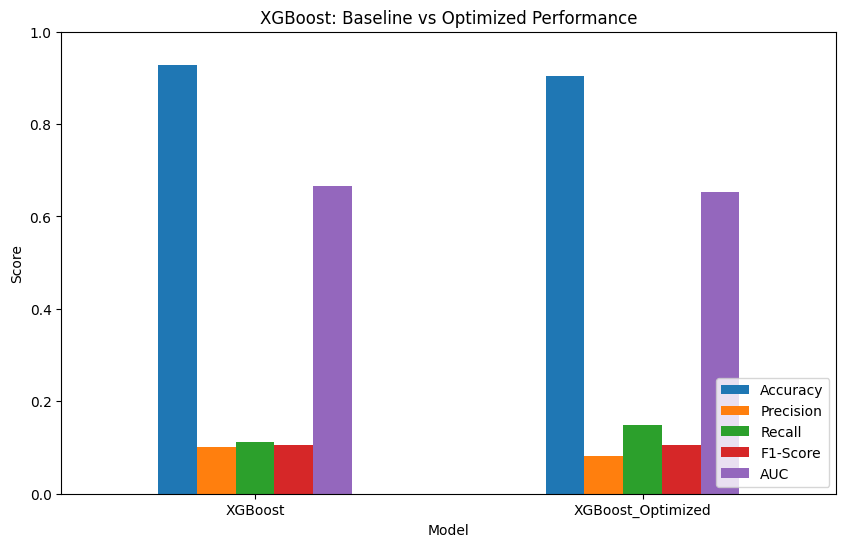

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

#  Retraining XGBoost with Optimized Parameters
best_params = random_search.best_params_

xgb_optimized = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
    **best_params
)

# Train on the training set
xgb_optimized.fit(X_train_final, y_train_res)

# Predict on the test set
y_pred_opt = xgb_optimized.predict(X_test_final)
y_prob_opt = xgb_optimized.predict_proba(X_test_final)[:, 1]

#  Evaluate Performance
results_optimized = {
    "Model": "XGBoost_Optimized",
    "Accuracy": accuracy_score(y_test, y_pred_opt),
    "Precision": precision_score(y_test, y_pred_opt),
    "Recall": recall_score(y_test, y_pred_opt),
    "F1-Score": f1_score(y_test, y_pred_opt),
    "AUC": roc_auc_score(y_test, y_prob_opt)
}

# Convert to DataFrame
results_df_opt = pd.DataFrame([results_optimized])
print("\nOptimized Model Performance:\n")
print(results_df_opt)

#  Compare with Baseline
# Combine baseline and optimized results
baseline_results = results_df[results_df['Model'] == 'XGBoost']
comparison_df = pd.concat([baseline_results, results_df_opt], ignore_index=True)
print("\nBaseline vs Optimized XGBoost Comparison:\n")
print(comparison_df)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
comparison_df.plot(
    x='Model',
    y=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    kind='bar',
    figsize=(10,6)
)
plt.title("XGBoost: Baseline vs Optimized Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


XGBoost Hyperparameter Tuning

I used RandomizedSearchCV to find the best hyperparameters for XGBoost and retrained the model.

After tuning, I compared the optimized model with the baseline.

Observation: The optimized model didn’t improve much accuracy and AUC were slightly lower than the baseline.

 Tuning is useful, but default parameters sometimes already work well.